In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
data_klausFe1 = pd.read_csv("C:/Users/lucia/Documents/Semestre8y9/Trabajo_grado/Tesis_Estrellas_binarias/Scripts/Growth_curve/DataSet/Inputs/Fe1_data_klaus.txt", delimiter = '\t', usecols = ['lambda', 'loggf', 'ewr1', 'ewr2'], header = 0)
data_klausTi2 = pd.read_csv("C:/Users/lucia/Documents/Semestre8y9/Trabajo_grado/Tesis_Estrellas_binarias/Scripts/Growth_curve/DataSet/Inputs/Ti2_data_klaus.txt", delimiter = '\t', usecols = ['lambda', 'loggf', 'ewr1', 'ewr2'], header = 0)

dataFe1_24oct = pd.read_csv("C:/Users/lucia/Documents/Semestre8y9/Trabajo_grado/Tesis_Estrellas_binarias/Scripts/Growth_curve/DataSet/Outputs/Fe1_growth_curve_24oct.dat", delimiter = '\t', header = 0)
dataTi2_24oct = pd.read_csv("C:/Users/lucia/Documents/Semestre8y9/Trabajo_grado/Tesis_Estrellas_binarias/Scripts/Growth_curve/DataSet/Outputs/Ti2_growth_curve_24oct.dat", delimiter = '\t', header = 0)

dataFe1_25oct = pd.read_csv("C:/Users/lucia/Documents/Semestre8y9/Trabajo_grado/Tesis_Estrellas_binarias/Scripts/Growth_curve/DataSet/Outputs/Fe1_growth_curve.dat", delimiter = '\t', header = 0)
dataTi2_25oct = pd.read_csv("C:/Users/lucia/Documents/Semestre8y9/Trabajo_grado/Tesis_Estrellas_binarias/Scripts/Growth_curve/DataSet/Outputs/Ti2_growth_curve.dat", delimiter = '\t', header = 0)

In [4]:
dataFe1_klaus = pd.read_csv("C:/Users/lucia/Documents/Semestre8y9/Trabajo_grado/Tesis_Estrellas_binarias/Scripts/Growth_curve/DataSet/Outputs/Fe 1_growth_curve_use.dat", delimiter = '\t', header = 0)
dataTi2_klaus = pd.read_csv("C:/Users/lucia/Documents/Semestre8y9/Trabajo_grado/Tesis_Estrellas_binarias/Scripts/Growth_curve/DataSet/Outputs/Ti 2_growth_curve_use.dat", delimiter = '\t', header = 0)

In [5]:
dataTi2_24oct  = dataTi2_24oct[~dataTi2_24oct.index.isin([0,1,8,13])]
dataTi2_24oct.index = list(range(len(dataTi2_24oct)))

In [6]:
dataTi2_25oct  = dataTi2_25oct[~dataTi2_25oct.index.isin([0,2,3,6,8,10,19])]
dataTi2_25oct.index = list(range(len(dataTi2_25oct)))

In [9]:
def lineal(x,a,b):
    return a*x + b

In [8]:


uno, uno1 = scipy.optimize.curve_fit(lineal, dataTi2_24oct['loggf'],dataTi2_24oct['EWR'])
dos, dos2 = scipy.optimize.curve_fit(lineal, dataTi2_25oct['loggf'],dataTi2_25oct['EWR'])

xfit = np.linspace(-2.5, 0.5, 100)
yfit1 = lineal(xfit,*uno)
yfit2 = lineal(xfit,*dos)
print(uno[0],dos[0])

ValueError: array must not contain infs or NaNs

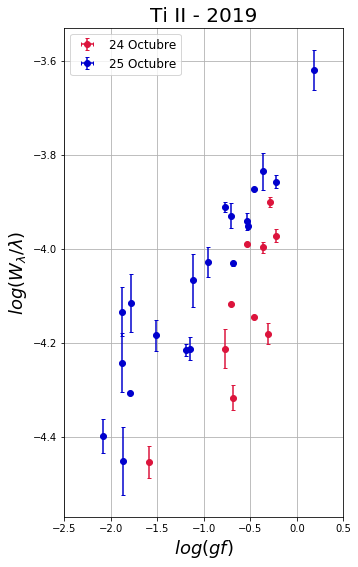

In [6]:
plt.figure(figsize = [5,9])

(_, caps, _) = plt.errorbar(dataTi2_24oct['loggf'],dataTi2_24oct['EWR'],dataTi2_24oct['errEWR']*0.6, 0, color = 'crimson', marker='o',ls = '',capsize=2,label = '24 Octubre')
(_, caps, _) = plt.errorbar(dataTi2_25oct['loggf'],dataTi2_25oct['EWR'],dataTi2_25oct['errEWR']*0.6, 0, color = 'mediumblue', marker='o',ls = '',capsize=2,label = '25 Octubre')

#plt.plot(xfit,yfit1,marker='', ls='-', color = 'red')
#plt.plot(xfit,yfit2,marker='', ls='-', color = 'blue')

for cap in caps:
    cap.set_markeredgewidth(1)


    
plt.xlim(-2.5,0.5)
#plt.ylim(-5, -3)
plt.grid()
plt.legend(loc="best", fontsize=12)
plt.title('Ti II - 2019',fontsize=20)
plt.ylabel("$log(W_{\lambda}/\lambda)$",fontsize=18)
plt.xlabel("$log(gf)$",fontsize=18)
#plt.legend(fontsize = 14)
plt.show()

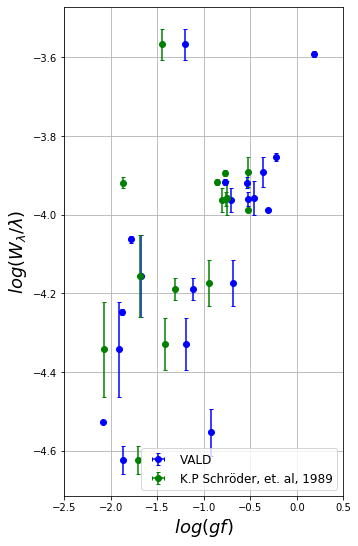

In [105]:
plt.figure(figsize = [5,9])
(_, caps, _) = plt.errorbar(dataTi2_25oct['loggf'],dataTi2_25oct['EWR'],dataTi2_25oct['errEWR']*0.6, 0, color = 'b', marker='o',ls = '',capsize=2,label = 'VALD')
(_, caps, _) = plt.errorbar(dataTi2_klaus['loggf_klaus'],dataTi2_klaus['EWR'],dataTi2_klaus['errEWR']*0.6, 0, color = 'g', marker='o',ls = '',capsize=2,label = 'K.P Schröder, et. al, 1989')

#plt.plot(xfit,yfit1,marker='', ls='-', color = 'red')
#plt.plot(xfit,yfit2,marker='', ls='-', color = 'blue')

for cap in caps:
    cap.set_markeredgewidth(1)


    
plt.xlim(-2.5,0.5)
#plt.ylim(-5, -3)
plt.grid()
plt.legend(loc="best", fontsize=12)
#plt.title('Ti II - prueba $log(gf)$',fontsize=20)
plt.ylabel("$log(W_{\lambda}/\lambda)$",fontsize=18)
plt.xlabel("$log(gf)$",fontsize=18)
#plt.legend(fontsize = 14)
plt.show()

In [12]:
tres, tres3 = scipy.optimize.curve_fit(lineal, data_klausTi2['loggf'],data_klausTi2['ewr1'])

xfit = np.linspace(-2.5, 0.5, 100)
yfit3 = lineal(xfit,*tres)

data_klausTi2  = data_klausTi2[~data_klausTi2.index.isin([1,3,6,7,13,15,16,19,24,25])]
data_klausTi2.index = list(range(len(data_klausTi2)))

cuatro, cuatro4 = scipy.optimize.curve_fit(lineal, data_klausTi2['loggf'],data_klausTi2['ewr2'])


yfit4 = lineal(xfit,*cuatro)
print(tres[0],cuatro[0])

0.4997542814577743 0.13171574246643392


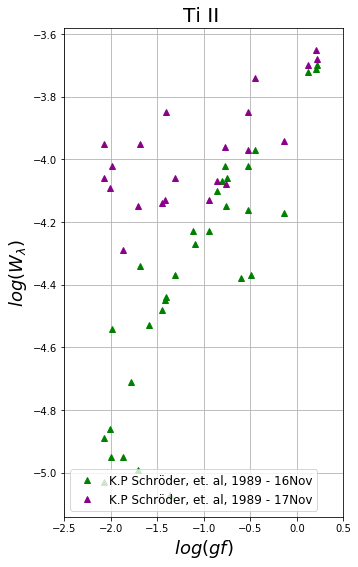

In [3]:
plt.figure(figsize = [5,9])


plt.plot(data_klausTi2['loggf'],data_klausTi2['ewr1'],marker='^', ls='', color = 'green', label = 'K.P Schröder, et. al, 1989 - 16Nov')
plt.plot(data_klausTi2['loggf'],data_klausTi2['ewr2'],marker='^', ls='', color = 'darkmagenta', label = 'K.P Schröder, et. al, 1989 - 17Nov')

#plt.plot(xfit,yfit3,marker='', ls='--', color = 'green')
#plt.plot(xfit,yfit4,marker='', ls='--', color = 'darkmagenta')

#(_, caps, _) = plt.errorbar(dataTi2_24oct['loggf'],dataTi2_24oct['EWR'],dataTi2_24oct['errEWR']*0.6, 0, color = 'mediumblue', marker='o',ls = '',capsize=2,label = '25 Octubre - 2019')

#plt.plot(xfit,yfit1,marker='', ls='-', color = 'red', label = 'ajuste - 24 oct')
#plt.plot(xfit,yfit2,marker='', ls='-', color = 'purple', label = 'ajuste - 25 oct')

#for cap in caps:
 #   cap.set_markeredgewidth(1)


#plt.axhline(-4.32)
#plt.axvline(-0.6)
#plt.axvline(-0.96)

plt.xlim(-2.5,0.5)
#plt.ylim(-5, -3)
plt.grid()
plt.legend(loc="best", fontsize=12)
plt.title('Ti II ',fontsize=20)
plt.ylabel("$log(W_{\lambda})$",fontsize=18)
plt.xlabel("$log(gf)$",fontsize=18)
#plt.legend(fontsize = 14)
plt.show()

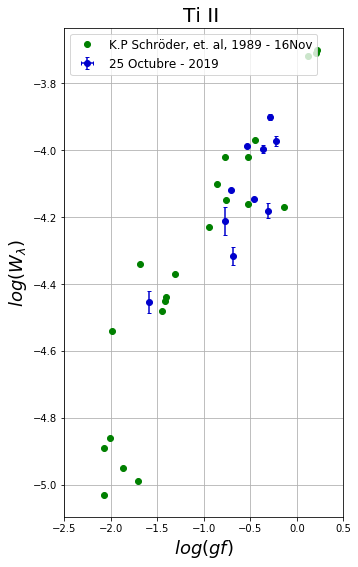

In [9]:
plt.figure(figsize = [5,9])


plt.plot(data_klausTi2['loggf'],data_klausTi2['ewr1'],marker='o', ls='', color = 'green', label = 'K.P Schröder, et. al, 1989 - 16Nov')
#plt.plot(data_klausTi2['loggf'],data_klausTi2['ewr2'],marker='o', ls='', color = 'olivedrab', label = 'K.P Schröder, et. al, 1989 - 17Nov')

#plt.plot(xfit,yfit3,marker='', ls='-', color = 'green', label = 'Curva teórica - 16Nov')
#plt.plot(xfit,yfit4,marker='', ls='-', color = 'olivedrab', label = 'Curva teórica - 17Nov')

(_, caps, _) = plt.errorbar(dataTi2_24oct['loggf'],dataTi2_24oct['EWR'],dataTi2_24oct['errEWR']*0.6, 0, color = 'mediumblue', marker='o',ls = '',capsize=2,label = '25 Octubre - 2019')
#plt.plot(xfit,yfit1,marker='', ls='-', color = 'red', label = 'ajuste - 24 oct')

for cap in caps:
    cap.set_markeredgewidth(1)


#plt.axhline(-4.32)
#plt.axvline(-0.6)
#plt.axvline(-0.96)

plt.xlim(-2.5,0.5)
#plt.ylim(-5, -3)
plt.grid()
plt.legend(loc="best", fontsize=12)
plt.title('Ti II ',fontsize=20)
plt.ylabel("$log(W_{\lambda})$",fontsize=18)
plt.xlabel("$log(gf)$",fontsize=18)
#plt.legend(fontsize = 14)
plt.show()

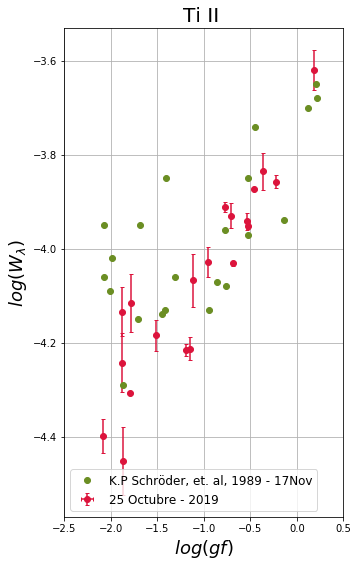

In [14]:
plt.figure(figsize = [5,9])


#plt.plot(data_klausTi2['loggf'],data_klausTi2['ewr1'],marker='o', ls='', color = 'green', label = 'K.P Schröder, et. al, 1989 - 16Nov')
plt.plot(data_klausTi2['loggf'],data_klausTi2['ewr2'],marker='o', ls='', color = 'olivedrab', label = 'K.P Schröder, et. al, 1989 - 17Nov')

#plt.plot(xfit,yfit3,marker='', ls='-', color = 'green', label = 'Curva teórica - 16Nov')
#plt.plot(xfit,yfit4,marker='', ls='-', color = 'olivedrab', label = 'Curva teórica - 17Nov')

(_, caps, _) = plt.errorbar(dataTi2_25oct['loggf'],dataTi2_25oct['EWR'],dataTi2_25oct['errEWR']*0.6, 0, color = 'crimson', marker='o',ls = '',capsize=2,label = '25 Octubre - 2019')
#plt.plot(xfit,yfit2,marker='', ls='-', color = 'purple', label = 'ajuste - 24 oct')

for cap in caps:
    cap.set_markeredgewidth(1)


#plt.axhline(-4.32)
#plt.axvline(-0.6)
#plt.axvline(-0.96)

plt.xlim(-2.5,0.5)
#plt.ylim(-5, -3)
plt.grid()
plt.legend(loc="best", fontsize=12)
plt.title('Ti II ',fontsize=20)
plt.ylabel("$log(W_{\lambda})$",fontsize=18)
plt.xlabel("$log(gf)$",fontsize=18)
#plt.legend(fontsize = 14)
plt.show()

In [7]:
dataFe1_24oct  = dataFe1_24oct[~dataFe1_24oct.index.isin([4,6])]
dataFe1_24oct.index = list(range(len(dataFe1_24oct)))

dataFe1_25oct  = dataFe1_25oct[~dataFe1_25oct.index.isin([4,6,7,11,13,14,19,22,23,24,25,26])]
dataFe1_25oct.index = list(range(len(dataFe1_25oct)))

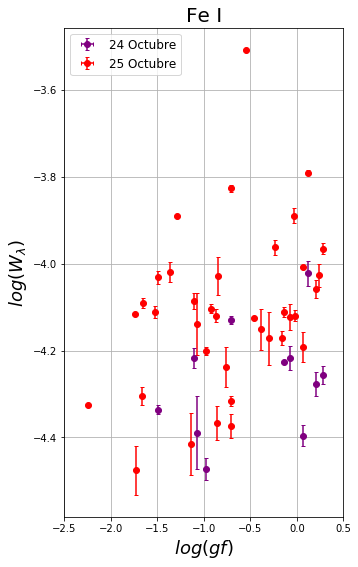

In [23]:
plt.figure(figsize = [5,9])



(_, caps, _) = plt.errorbar(dataFe1_24oct['loggf'],dataFe1_24oct['EWR'],dataFe1_24oct['errEWR']*0.6, 0, color = 'purple', marker='o',ls = '',capsize=2,label = '24 Octubre')

#plt.plot(xfit,yfit5,marker='', ls='-', color = 'purple', label = 'ajuste - 24 oct')

(_, caps, _) = plt.errorbar(dataFe1_25oct['loggf'],dataFe1_25oct['EWR'],dataFe1_25oct['errEWR']*0.2, 0, color = 'red', marker='o',ls = '',capsize=2,label = '25 Octubre')

#plt.plot(xfit,yfit6,marker='', ls='-', color = 'red', label = 'ajuste - 25 oct')


for cap in caps:
    cap.set_markeredgewidth(1)



#plt.axhline(-4.1)
#plt.axvline(-1.14)
#plt.axvline(-1.6)
    
plt.xlim(-2.5,0.5)
#plt.ylim(-5, -3)
plt.grid()
plt.legend(loc="best", fontsize=12)
plt.title('Fe I',fontsize=20)
plt.ylabel("$log(W_{\lambda})$",fontsize=18)
plt.xlabel("$log(gf)$",fontsize=18)
#plt.legend(fontsize = 14)
plt.show()

In [71]:
cinco, cinco5 = scipy.optimize.curve_fit(lineal, dataFe1_24oct['loggf'],dataFe1_24oct['EWR'])
seis, seis6 = scipy.optimize.curve_fit(lineal, dataFe1_25oct['loggf'],dataFe1_25oct['EWR'])

xfit = np.linspace(-1.5, 0.5, 100)
yfit5 = lineal(xfit,*cinco)
yfit6 = lineal(xfit,*seis)
print(cinco[0],seis[0])

0.07279478796985314 0.0996174195982037


In [70]:
siete, siete7 = scipy.optimize.curve_fit(lineal, data_klausFe1['loggf'],data_klausFe1['ewr1'])

xfit = np.linspace(-2.5, 0.5, 100)
yfit7 = lineal(xfit,*tres)

data_klausFe1  = data_klausFe1[~data_klausFe1.index.isin([0,1,3,4,5,6,8,9,12,17,20,21,26,26,27,28,29,35,38,39,40,41,42])]
data_klausFe1.index = list(range(len(data_klausFe1)))
ocho, ocho8 = scipy.optimize.curve_fit(lineal, data_klausFe1['loggf'],data_klausFe1['ewr2'])


yfit8 = lineal(xfit,*cuatro)
print(siete[0],ocho[0])

0.14303020880513284 0.013585235940134388


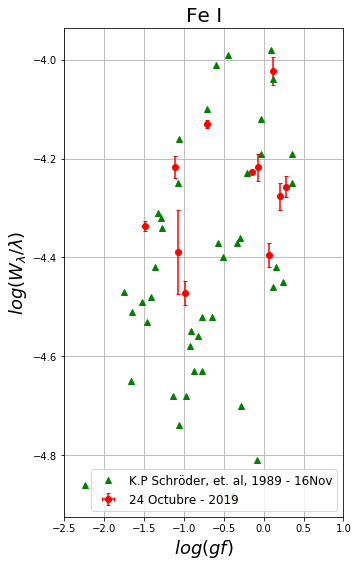

In [4]:
plt.figure(figsize = [5,9])


plt.plot(data_klausFe1['loggf'],data_klausFe1['ewr1'],marker='^', ls='', color = 'green', label = 'K.P Schröder, et. al, 1989 - 16Nov')
#plt.plot(data_klausFe1['loggf'],data_klausFe1['ewr2'],marker='o', ls='', color = 'olivedrab', label = 'K.P Schröder, et. al, 1989 - 17Nov')

#plt.plot(xfit,yfit7,marker='', ls='-', color = 'green', label = 'Curva teórica - 16Nov')
#plt.plot(xfit,yfit8,marker='', ls='-', color = 'olivedrab', label = 'Curva teórica - 16Nov')

(_, caps, _) = plt.errorbar(dataFe1_24oct['loggf'],dataFe1_24oct['EWR'],dataFe1_24oct['errEWR']*0.6, 0, color = 'red', marker='o',ls = '',capsize=2,label = '24 Octubre - 2019')

#plt.plot(xfit,yfit5,marker='', ls='-', color = 'purple', label = 'ajuste - 24 oct')


for cap in caps:
    cap.set_markeredgewidth(1)



#plt.axhline(-4.1)
#plt.axvline(-1.14)
#plt.axvline(-1.6)
    
plt.xlim(-2.5,1)
#plt.ylim(-5, -3)
plt.grid()
plt.legend(loc="best", fontsize=12)
plt.title('Fe I',fontsize=20)
plt.ylabel("$log(W_{\lambda}/\lambda)$",fontsize=18)
plt.xlabel("$log(gf)$",fontsize=18)
#plt.legend(fontsize = 14)
plt.show()

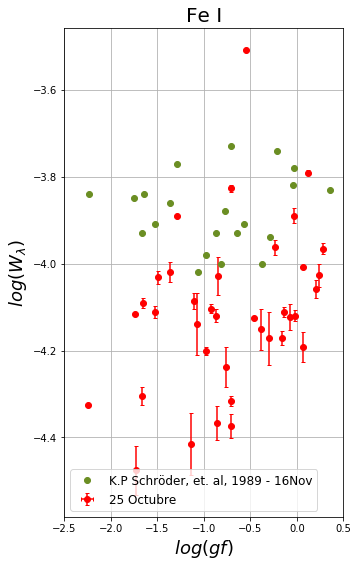

In [19]:
plt.figure(figsize = [5,9])


#plt.plot(data_klausFe1['loggf'],data_klausFe1['ewr1'],marker='o', ls='', color = 'green', label = 'K.P Schröder, et. al, 1989 - 17Nov')
plt.plot(data_klausFe1['loggf'],data_klausFe1['ewr2'],marker='o', ls='', color = 'olivedrab', label = 'K.P Schröder, et. al, 1989 - 16Nov')

#plt.plot(xfit,yfit7,marker='', ls='-', color = 'green', label = 'Curva teórica - 16Nov')
#plt.plot(xfit,yfit8,marker='', ls='-', color = 'olivedrab', label = 'Curva teórica - 16Nov')

(_, caps, _) = plt.errorbar(dataFe1_25oct['loggf'],dataFe1_25oct['EWR'],dataFe1_25oct['errEWR']*0.2, 0, color = 'red', marker='o',ls = '',capsize=2,label = '25 Octubre')

#plt.plot(xfit,yfit6,marker='', ls='-', color = 'red', label = 'ajuste - 25 oct')


for cap in caps:
    cap.set_markeredgewidth(1)



#plt.axhline(-4.1)
#plt.axvline(-1.14)
#plt.axvline(-1.6)
    
plt.xlim(-2.5,0.5)
#plt.ylim(-5, -3)
plt.grid()
plt.legend(loc="best", fontsize=12)
plt.title('Fe I',fontsize=20)
plt.ylabel("$log(W_{\lambda})$",fontsize=18)
plt.xlabel("$log(gf)$",fontsize=18)
#plt.legend(fontsize = 14)
plt.show()

In [20]:
h_1947_Fe = np.array([9.4e5,11.6e5,17.6e5,24.3e5,25.8e5])
logN_1947_1_Fe = [15.17,14.74,14.24,13.54,13.4]
logN_1947_2_Fe = [13.77,13.42,12.94,12.58,12.36]



h_1987 = [6.13e6, 2.25e6]

logN_1987 = [16.15, 17]
logN_1987_Fe = [14.8, 16.15]


h_2019 = [1.02e7,4.39e6]
logN_2019__ = [16.81436187, 16.9362691]
logN_2019 = [16.51, 17.2]

logN_2019_Fe__ = [14.8 , 15.59958106]
logN_2019_Fe = [15.16, 16.56]

In [21]:
m2, m_2 = scipy.optimize.curve_fit(lineal, h_1987, logN_1987)
m3, m_3 = scipy.optimize.curve_fit(lineal, h_2019, logN_2019)
m6, m_6 = scipy.optimize.curve_fit(lineal, h_1987, logN_1987_Fe)
m7, m_7 = scipy.optimize.curve_fit(lineal, h_2019, logN_2019_Fe)

xfit_ = np.linspace(9e5, 1.05e7, 100)

yfit_2 = lineal(xfit_,*m2)
yfit_3 = lineal(xfit_,*m3)
yfit_6 = lineal(xfit_,*m6)
yfit_7 = lineal(xfit_,*m7)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


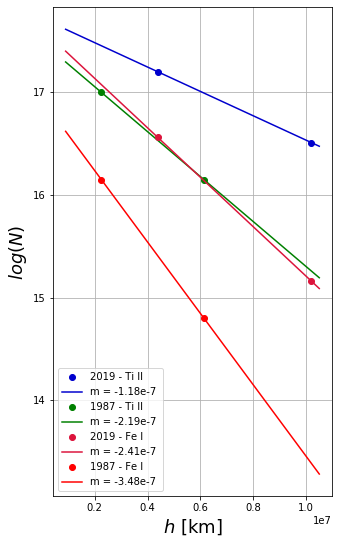

In [22]:
plt.figure(figsize = [5,9])


plt.plot(h_2019,logN_2019,marker='o', ls='', color = 'mediumblue', label = '2019 - Ti II')
plt.plot(xfit_,yfit_3,marker='', ls='-', color = 'mediumblue', label = 'm = -1.18e-7')

plt.plot(h_1987,logN_1987,marker='o', ls='', color = 'green', label = '1987 - Ti II')
plt.plot(xfit_,yfit_2,marker='', ls='-', color = 'green', label = 'm = -2.19e-7')


plt.plot(h_2019,logN_2019_Fe,marker='o', ls='', color = 'crimson', label = '2019 - Fe I')
plt.plot(xfit_,yfit_7,marker='', ls='-', color = 'crimson', label = 'm = -2.41e-7')

plt.plot(h_1987,logN_1987_Fe,marker='o', ls='', color = 'red', label = '1987 - Fe I')
plt.plot(xfit_,yfit_6,marker='', ls='-', color = 'red', label = 'm = -3.48e-7 ')

plt.grid()
plt.legend(loc="lower right")
plt.ylabel("$log(N)$",fontsize=18)
plt.xlabel("$h$ [km]",fontsize=18)

plt.legend(fontsize = 10)
plt.show()

# **CURVA TEÓRICA**

In [9]:
data_teoric_klausTi2 = pd.read_excel("C:/Users/lucia/Documents/Semestre8y9/Trabajo_grado/Tesis_Estrellas_binarias/Scripts/Growth_curve/DataSet/Inputs/curva_teorica.xlsx", sheet_name="Sheet1")
data_teoric_klausFe1 = pd.read_excel("C:/Users/lucia/Documents/Semestre8y9/Trabajo_grado/Tesis_Estrellas_binarias/Scripts/Growth_curve/DataSet/Inputs/curva_teorica.xlsx", sheet_name="Sheet2")

# Titanio

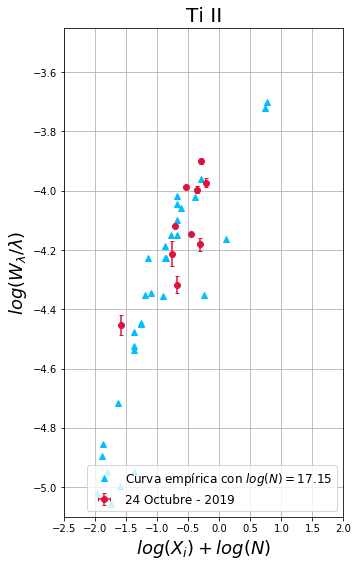

In [23]:
plt.figure(figsize = [5,9])

plt.plot(data_teoric_klausTi2['X']-1,data_teoric_klausTi2['WL']*-1,marker='^', ls='', color = 'deepskyblue', label = 'Curva empírica con $log(N)= 17.15$')

(_, caps, _) = plt.errorbar(dataTi2_24oct['loggf'],dataTi2_24oct['EWR'],dataTi2_24oct['errEWR']*0.6, 0, color = 'crimson', marker='o',ls = '',capsize=2,label = '24 Octubre - 2019')
#plt.plot(xfit,yfit1,marker='', ls='--', color = 'crimson')

plt.xlim(-2.5,2)
plt.ylim(-5.1, -3.45)
plt.grid()
plt.legend(loc="lower right", fontsize=12)
plt.title('Ti II',fontsize=20)
plt.ylabel("$log(W_{\lambda}/\lambda)$",fontsize=18)
plt.xlabel("$log(X_i) + log(N)$",fontsize=18)
#plt.legend(fontsize = 14)
plt.show()

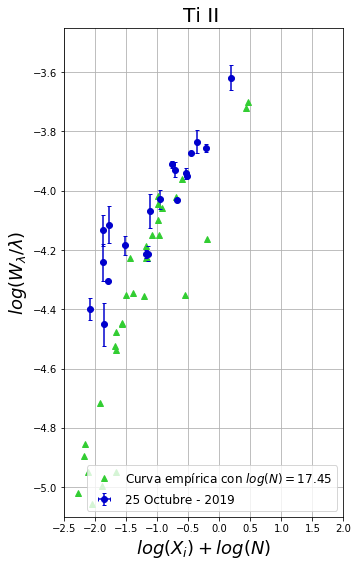

In [22]:
plt.figure(figsize = [5,9])

plt.plot(data_teoric_klausTi2['X']-1.3,data_teoric_klausTi2['WL']*-1,marker='^', ls='', color = 'limegreen', label = 'Curva empírica con $log(N)= 17.45$')

(_, caps, _) = plt.errorbar(dataTi2_25oct['loggf'],dataTi2_25oct['EWR'],dataTi2_25oct['errEWR']*0.6, 0, color = 'mediumblue', marker='o',ls = '',capsize=2,label = '25 Octubre - 2019')
#plt.plot(xfit,yfit2,marker='', ls='--', color = 'mediumblue')

plt.xlim(-2.5,2)
plt.ylim(-5.1, -3.45)
plt.grid()
plt.legend(loc="best", fontsize=12)
plt.title('Ti II ',fontsize=20)
plt.ylabel("$log(W_{\lambda}/\lambda)$",fontsize=18)
plt.xlabel("$log(X_i) + log(N)$",fontsize=18)
#plt.legend(fontsize = 14)
plt.show()

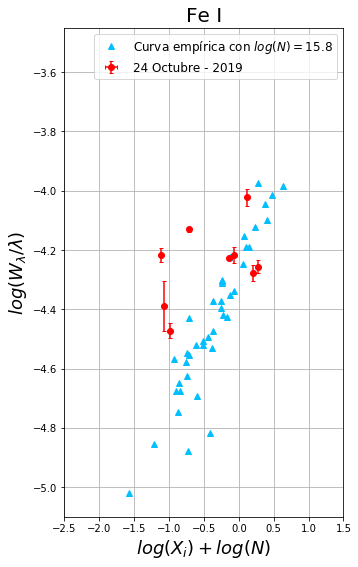

In [19]:
plt.figure(figsize = [5,9])

plt.plot(data_teoric_klausFe1['X']-1,data_teoric_klausFe1['WL'],marker='^', ls='', color = 'deepskyblue', label = 'Curva empírica con $log(N)= 15.8$')

(_, caps, _) = plt.errorbar(dataFe1_24oct['loggf'],dataFe1_24oct['EWR'],dataFe1_24oct['errEWR']*0.6, 0, color = 'red', marker='o',ls = '',capsize=2,label = '24 Octubre - 2019')
#plt.plot(data_klausFe1['loggf'],data_klausFe1['ewr1'],marker='o', ls='', color = 'olivedrab', label = 'K.P Schröder, et. al, 1989 - 16Nov')
#plt.plot(xfit,yfit3-0.4,marker='', ls='--', color = 'red')
#plt.plot(xfit,yfit5,marker='', ls='--', color = 'red')

plt.xlim(-2.5,1.5)
plt.ylim(-5.1, -3.45)
plt.grid()
plt.legend(loc="best", fontsize=12)
plt.title('Fe I',fontsize=20)
plt.ylabel("$log(W_{\lambda}/\lambda)$",fontsize=18)
plt.xlabel("$log(X_i) + log(N)$",fontsize=18)
#plt.legend(fontsize = 14)
plt.show()

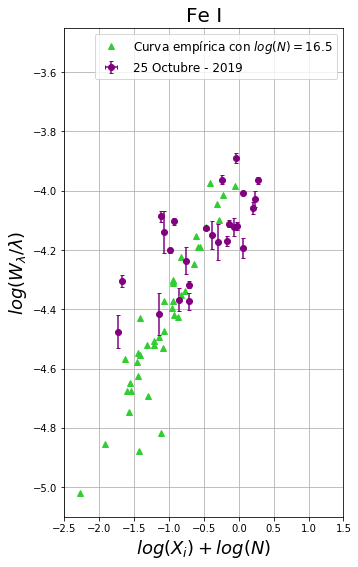

In [21]:
plt.figure(figsize = [5,9])

plt.plot(data_teoric_klausFe1['X']-1.7,data_teoric_klausFe1['WL'],marker='^', ls='', color = 'limegreen', label = 'Curva empírica con $log(N)= 16.5$')

(_, caps, _) = plt.errorbar(dataFe1_25oct['loggf'],dataFe1_25oct['EWR'],dataFe1_25oct['errEWR']*0.2, 0, color = 'purple', marker='o',ls = '',capsize=2,label = '25 Octubre - 2019')
#plt.plot(data_klausFe1['loggf'],data_klausFe1['ewr2'],marker='o', ls='', color = 'olivedrab', label = 'K.P Schröder, et. al, 1989 - 17Nov')
#plt.plot(xfit,yfit2-0.2,marker='', ls='--', color = 'purple')

plt.xlim(-2.5,1.5)
plt.ylim(-5.1, -3.45)
plt.grid()
plt.legend(loc="best", fontsize=12)
plt.title('Fe I',fontsize=20)
plt.ylabel("$log(W_{\lambda}/\lambda)$",fontsize=18)
plt.xlabel("$log(X_i)+log(N)$",fontsize=18)
#plt.legend(fontsize = 14)
plt.show()

In [151]:
h_1947_Ti = np.array([9.4e5,11.6e5,17.6e5,24.3e5,25.8e5,27.6e5,41.5e5,48e5])*1.4
logN_1947_1_Ti = [14.58,14.46,13.95,13.91,13.98,13.07,12.74,12.32]
logN_1947_2_Ti = [14.11,13.75,13.34,13.18,12.99,12.34,12.01,11.62]

h_1947_Fe = np.array([9.4e5,11.6e5,17.6e5,24.3e5,25.8e5])*1.4
logN_1947_1_Fe = [15.17,14.74,14.24,13.54,13.4]
logN_1947_2_Fe = [13.77,13.42,12.94,12.58,12.36]


h_1987 = [6.13e6, 2.25e6]
logN_1987_Ti = [16.15, 17]

logN_1987_Fe = [14.8, 16.15]


h_2019 = [1.02e7,4.39e6]
logN_2019_Ti = [17.15, 17.45]

logN_2019_Fe = [15.8, 16.5]

In [146]:
def lineal(x,a,b):
    return a*x + b

In [152]:
m, m_ = scipy.optimize.curve_fit(lineal, h_1947_Ti, logN_1947_1_Ti)
m1, m_1 = scipy.optimize.curve_fit(lineal, h_1947_Ti, logN_1947_2_Ti)
m2, m_2 = scipy.optimize.curve_fit(lineal, h_1987, logN_1987_Ti)
m3, m_3 = scipy.optimize.curve_fit(lineal, h_2019, logN_2019_Ti)


m4, m_4 = scipy.optimize.curve_fit(lineal, h_1947_Fe, logN_1947_1_Fe)
m5, m_5 = scipy.optimize.curve_fit(lineal, h_1947_Fe, logN_1947_2_Fe)
m6, m_6 = scipy.optimize.curve_fit(lineal, h_1987, logN_1987_Fe)
m7, m_7 = scipy.optimize.curve_fit(lineal, h_2019, logN_2019_Fe)

xfit_ = np.linspace(9e5, 1.05e7, 100)

yfit_ = lineal(xfit_,*m)
yfit_1 = lineal(xfit_,*m1)
yfit_2 = lineal(xfit_,*m2)
yfit_3 = lineal(xfit_,*m3)

yfit_4 = lineal(xfit_,*m4)
yfit_5 = lineal(xfit_,*m5)
yfit_6 = lineal(xfit_,*m6)
yfit_7 = lineal(xfit_,*m7)

In [153]:
print(m[0],m1[0],m2[0],m3[0],m4[0],m5[0],m6[0],m7[0])

-4.1475117251456806e-07 -4.417788238751058e-07 -2.1907216494845445e-07 -5.163511187607602e-08 -7.362313719375157e-07 -5.609448229883594e-07 -3.4793814432989643e-07 -1.2048192771084332e-07


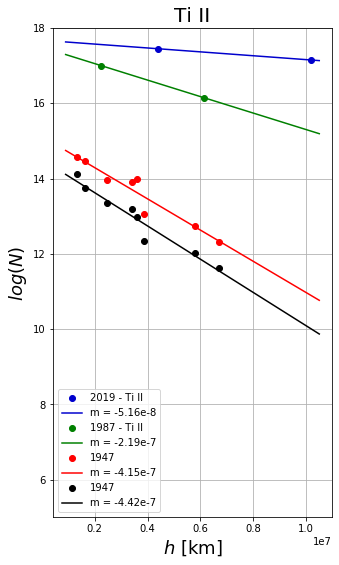

In [154]:
plt.figure(figsize = [5,9])


plt.plot(h_2019,logN_2019_Ti,marker='o', ls='', color = 'mediumblue', label = '2019 - Ti II')
plt.plot(xfit_,yfit_3,marker='', ls='-', color = 'mediumblue', label = 'm = -5.16e-8')

plt.plot(h_1987,logN_1987_Ti,marker='o', ls='', color = 'green', label = '1987 - Ti II')
plt.plot(xfit_,yfit_2,marker='', ls='-', color = 'green', label = 'm = -2.19e-7')

plt.plot(h_1947_Ti,logN_1947_1_Ti,marker='o', ls='', color = 'red', label = '1947')
plt.plot(xfit_,yfit_,marker='', ls='-', color = 'red', label = 'm = -4.15e-7')

plt.plot(h_1947_Ti,logN_1947_2_Ti,marker='o', ls='', color = 'black', label = '1947')
plt.plot(xfit_,yfit_1,marker='', ls='-', color = 'black', label = 'm = -4.42e-7')

plt.grid()
plt.ylim(5, 18)

plt.title('Ti II',fontsize=20)
plt.legend(loc="lower right")
plt.ylabel("$log(N)$",fontsize=18)
plt.xlabel("$h$ [km]",fontsize=18)

plt.legend(fontsize = 10)
plt.show()

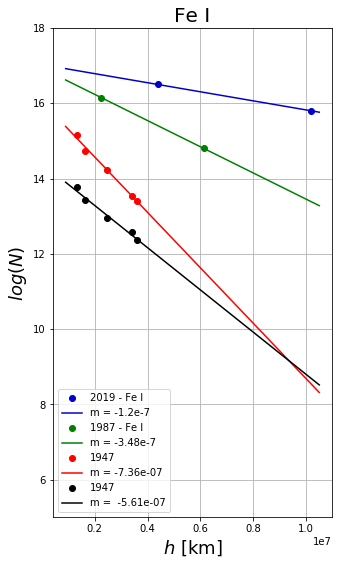

In [156]:
plt.figure(figsize = [5,9])

plt.plot(h_2019,logN_2019_Fe,marker='o', ls='', color = 'mediumblue', label = '2019 - Fe I')
plt.plot(xfit_,yfit_7,marker='', ls='-', color = 'mediumblue', label = 'm = -1.2e-7')

plt.plot(h_1987,logN_1987_Fe,marker='o', ls='', color = 'green', label = '1987 - Fe I')
plt.plot(xfit_,yfit_6,marker='', ls='-', color = 'green', label = 'm = -3.48e-7 ')

plt.plot(h_1947_Fe,logN_1947_1_Fe,marker='o', ls='', color = 'red', label = '1947')
plt.plot(xfit_,yfit_4,marker='', ls='-', color = 'red', label = 'm = -7.36e-07')

plt.plot(h_1947_Fe,logN_1947_2_Fe,marker='o', ls='', color = 'black', label = '1947')
plt.plot(xfit_,yfit_5,marker='', ls='-', color = 'black', label = 'm =  -5.61e-07')

plt.grid()
plt.ylim(5, 18)
plt.title('Fe I',fontsize=20)
plt.legend(loc="lower right")
plt.ylabel("$log(N)$",fontsize=18)
plt.xlabel("$h$ [km]",fontsize=18)

plt.legend(fontsize = 10)
plt.show()